In [57]:
# 读取数据

import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
data= pd.read_csv("E:\Pycharm\Intrusion_Detection\kddcup.data_10_percent.csv",  header=None,names = col_names)
data.head()
#去重
data_1=data.drop_duplicates()
# print(data_1.info())
#one-hot
dummies_protocol = pd.get_dummies(data_1["protocol_type"], prefix='protocol')
dummies_flag = pd.get_dummies(data_1["flag"], prefix='flag')
data_2 = pd.concat([data_1, dummies_protocol,dummies_flag], axis=1)
# data_2
#特征选择
#建立X,y
feature_selection=["duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","protocol_icmp","protocol_tcp","protocol_udp",
    "flag_OTH","flag_REJ","flag_RSTO","flag_RSTOS0","flag_RSTR","flag_S0","flag_S1","flag_S2","flag_S3","flag_SF","flag_SH"]
X_3=data_2[feature_selection]
y_3=data_2['label'].copy()   #一维
##y的处理
u2r=["buffer_overflow.","loadmodule.","perl.","rootkit."]
r2l=["ftp_write.","imap.","guess_passwd.","phf.","spy.","multihop.","warezmaster.","warezclient."]
dos=["back.","land.","pod.","neptune.","smurf.","teardrop."]
probe=["satan.","portsweep.","ipsweep.","nmap."]
for i in u2r:
    y_3[y_3==i]=4 #u2r
for i in r2l:
    y_3[y_3==i]=3 #r2l
for i in dos:
    y_3[y_3==i]=1  #dos
for i in probe:
    y_3[y_3==i]=2 #probe
y_3[y_3=="normal."]=0 #normal

In [58]:
print(y_3)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
493991    0
493992    0
493993    0
493994    0
493995    0
493996    0
493997    0
493998    0
493999    0
494000    0
494001    0
494002    0
494003    0
494004    0
494005    0
494006    0
494007    0
494008    0
494009    0
494010    0
494011    0
494012    0
494013    0
494014    0
494015    0
494016    0
494017    0
494018    0
494019    0
494020    0
Name: label, dtype: object


In [59]:
y_5=np.array(y_3)
print(y_5)
# y_4= y_5[:,np.newaxis]
# print(y_4)

[0 0 0 ..., 0 0 0]


In [61]:
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X_3,y_5,test_size=0.1,random_state=0)
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_test_1)
X_embedded

array([[  2.18407416, -28.6966362 ],
       [-21.07651329,  58.38592911],
       [ -6.43495655,  70.36444855],
       ..., 
       [-55.57003021,   7.50009441],
       [ 30.65622139, -36.51931763],
       [ 46.45974731, -22.85419464]], dtype=float32)

In [37]:
# print(y_test_1)
# print(X_embedded.shape)

[[1]
 [0]
 [0]
 ..., 
 [1]
 [1]
 [1]]


In [39]:
# data=np.concatenate((X_embedded,y_test_1),axis=1)
# print(data)

[[21.49517059326172 -10.174467086791992 1]
 [25.254056930541992 -65.265380859375 0]
 [23.412723541259766 -49.113433837890625 0]
 ..., 
 [68.0768814086914 -19.94960594177246 1]
 [4.774269104003906 21.688875198364258 1]
 [-5.324077129364014 62.3205680847168 1]]


In [54]:
print(y_test_1)
print(X_embedded.shape)

[1 0 0 ..., 1 1 1]
(14559, 2)


In [61]:
import matplotlib.pyplot as plt
classes=['normal','probe','dos','u2r','r2l']
colors=['blue','red','y','m','g']
plt.figure()
for label,color in zip(range(len(classes)),colors):
    plt.scatter(X_embedded[y_test_1==label,0],
                X_embedded[y_test_1==label,1],
                label=classes[label],
                c=color)
plt.legend(loc='best')
plt.show()

In [65]:
import matplotlib.pyplot as plt
classes=['normal','probe','dos','u2r','r2l']
colors=['blue','red','y','m','g']
# plt.figure()
for index,label,color in zip(range(len(classes)),classes,colors):
    print(index)
    print(label)
    print(color)
# plt.legend(loc='best')
# plt.show()

0
normal
blue
1
probe
red
2
dos
y
3
u2r
m
4
r2l
g


[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]
[0 0 0]
['setosa' 'versicolor' 'virginica']


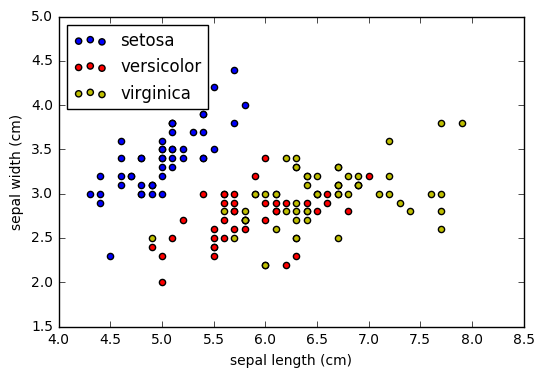

In [17]:
from sklearn.datasets import load_iris
#加载数据集
iris=load_iris()
iris.keys()
#数据的条数和维数
n_samples,n_features=iris.data.shape
#第一个样例
print(iris.data[0:3])
print(iris.target[0:3])

import numpy as np
print(iris.target_names)
import matplotlib.pyplot as plt
#画散点图，第一维的数据作为x轴和第二维的数据作为y轴
x_index=0
y_index=1
colors=['blue','red','y']
for label,color in zip(range(len(iris.target_names)),colors):
    plt.scatter(iris.data[iris.target==label,x_index],
                iris.data[iris.target==label,y_index],
                label=iris.target_names[label],
                c=color)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

In [21]:
for label,color in zip(range(len(iris.target_names)),colors):
    print(label)
    print(color)

0
blue
1
red
2
y


In [44]:
from sklearn.preprocessing import StandardScaler
scaler_base=StandardScaler().fit(X_3)
X=scaler_base.transform(X_3)

In [45]:
X

array([[-0.10785024, -0.0042929 ,  0.04259559, ..., -0.0082881 ,
         0.81524229, -0.01528377],
       [-0.10785024, -0.00426104, -0.03903628, ..., -0.0082881 ,
         0.81524229, -0.01528377],
       [-0.10785024, -0.00426324, -0.02504178, ..., -0.0082881 ,
         0.81524229, -0.01528377],
       ..., 
       [-0.10785024, -0.00428082, -0.02729471, ..., -0.0082881 ,
         0.81524229, -0.01528377],
       [-0.10785024, -0.00423247, -0.02729471, ..., -0.0082881 ,
         0.81524229, -0.01528377],
       [-0.10785024, -0.00427203, -0.02673559, ..., -0.0082881 ,
         0.81524229, -0.01528377]])